In [37]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Задача 1

В таблицата са представени данни за броя на заразените от дадено инфекциозно заболяване в един град в течение на 5 седмици:

| поредна седмица | 1 | 2   | 3   | 4    | 5     |
| --------------- | - | --- | --- | ---- | ----- |
| брой заразени   | 3 | 128 | 115 | 1050 | 13500 |

Намерете обобщен полином, който интерполира данните, като използвате подходящ базис.
Илюстрирайте решението графично.

Примерни базиси:

{1, x, x^2, ..., x^n}

{1, e^x, e^(2x), ..., e^(nx)}

{1, sin x, cos x, ..., sin(nx), cos(nx)}

{1, e^(-x), e^(-2x), ..., e^(-nx)}

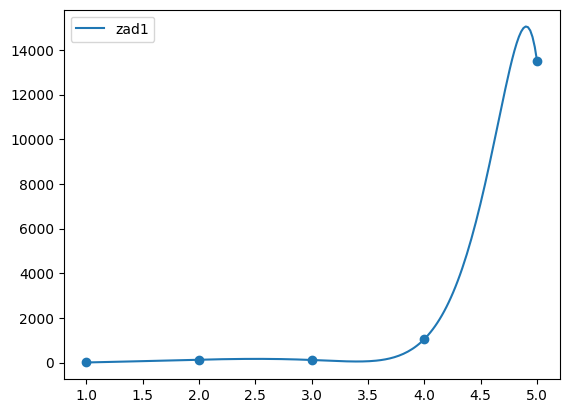

In [38]:
def exponential_basis(x):
    return np.array([np.exp(0), np.exp(1*x), np.exp(2*x), np.exp(3*x),np.exp(4*x)])

def createPoly(x):
    coeff = np.linalg.solve(A, y_values)
    sum = 0
    for i in range (n):
        sum+=coeff[i]*np.exp(i*x)
    return sum

x_values = np.array([1,2,3,4,5])
y_values = np.array([3,128,115,1050,13500])
n = len(x_values)

A = np.zeros([n,n])
for i in range (n):
    A[i] = exponential_basis(x_values[i])

x_axis = np.linspace(1, 5, 200)
y_axis = createPoly(x_axis)
plt.plot(x_axis, y_axis, label = "zad1")
plt.scatter(x_values, y_values)
plt.legend()

## Задача 2

Да се приближи функцията:

f(x) = ln(x^3)

като се построи полином на Ермит с възли 0.2, 0.3 и съответни кратности 2 и 1.

Да се построи графика на относителната грешка по абсолютна стойност в интервала на интерполацията.

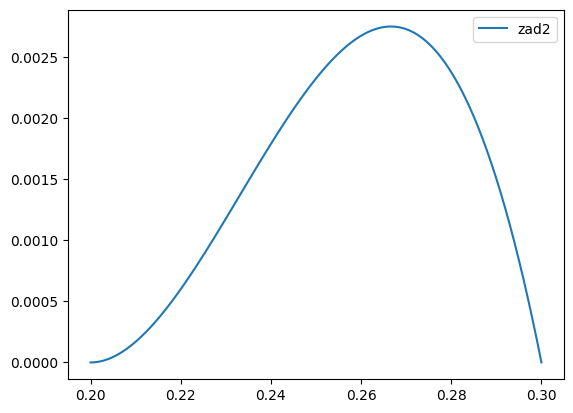

In [39]:
def f(x):
    return np.log(x**3)

def divided_difference_extended(x_values, y_values, l, r):
    if(x_values[l]==x_values[r]):
        return y_values[np.argmax(x_values==x_values[l])+r-l]/math.factorial(r-l)
    return (divided_difference_extended(x_values, y_values, l+1, r)- divided_difference_extended(x_values, y_values, l, r-1))/(x_values[r]-x_values[l])

def hermit_poly(x):
    sum = 0
    mult = 1
    n = len(x_values)
    for i in range(n):
        sum+=divided_difference_extended(x_values, y_values, 0, i)*mult
        mult*=(x-x_values[i])
    return sum

def relativeError(actual, approx):
    return np.abs((actual-approx)/actual)

x_values = np.array([0.2, 0.2, 0.3])
y_values = np.array([f(x_values[0]), 3*(x_values[1]**2)/(x_values[1]**3), f(x_values[2])])

x_axis = np.linspace(0.2, 0.3, 100)
y_axis = relativeError(f(x_axis), hermit_poly(x_axis))
plt.plot(x_axis, y_axis, label = "zad2")
plt.legend()

## Задача 3

Да се дефинира функция:

Lagrange[n_, A_, B_, f_, x_]

която построява интерполационния полином на Лагранж от степен n за функцията f(x) с равноотдалечени възли в интервала [A, B], като използва формулата на Лагранж.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

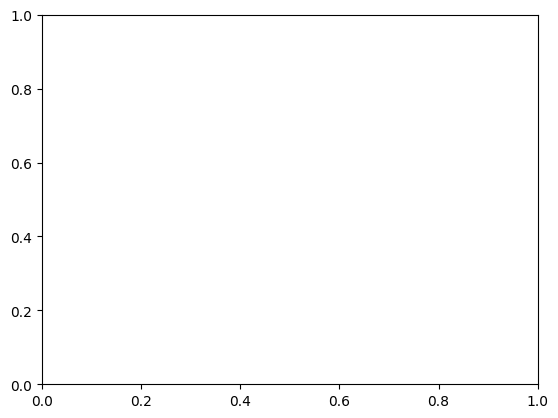

In [ ]:
def l(x, idx, x_values):
    product = 1
    for k in range(len(x_values)):
        if k!=idx:
            product*= (x-x_values[k])/(x_values[idx]-x_values[k])
    return product

def createLagPoly(x, x_values, y_values):
    sum = 0
    for i in range(len(x_values)):
        sum+=y_values[i]*l(x, i, x_values)
    return sum

def lagrange(n, A, B, f, x):
    x_values = np.linspace(A, B, n+1)
    y_values = f(x_values)
    return createLagPoly(x, x_values, y_values)

x_axis = np.linspace(0, 2*np.pi, 1000)
y_axis = lagrange(5, 0, 2*np.pi, np.sin, x_axis)
plt.plot(x_axis, y_axis)